<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

We've discussed overfitting in the context of bias and variance, and we've touched on some techniques, such as regularization, that are used to avoid overfitting (but haven't practiced them yet). In this lesson we'll discuss a fundamental method for avoiding overfitting that is commonly referred to as _train/test split_ validation. 

The idea is similar to something called "cross-validation" — in fact, it is a type of cross-validation — in that we split the data set into two subsets:
* A subset on which to train our model.
* A subset on which to test our model's predictions.

This serves two useful purposes:
* We prevent overfitting by not using all of the data.
* We have some remaining data we can use to evaluate our model.

While this may seem like a relatively simple idea, **there are some caveats** to putting it into practice. For example, if you are not careful, it is easy to take a non-random split. Suppose we have salary data on technical professionals that is composed of 80 percent data from California and 20 percent data from elsewhere and is sorted by state. If we split our data into 80 percent training data and 20 percent testing data, we might inadvertantly select all the California data to train and all the non-California data to test. In this case we've still overfit on our data set because we did not sufficiently randomize the data.

In a situation like this we can use _k-fold cross-validation_, which is the same idea applied to more than two subsets. In particular, we partition our data into $k$ subsets and train on $k-1$ one of them, holding the last slice for testing. We can do this for each of the possible $k-1$ subsets.

# Independent Practice

Ultimately we use a test-training split to compare multiple models on the same data set. This could be comparisons of two linear models or of completely different models on the same data.

For your independent practice, fit three different models on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model you'd like. 

### Here's What We Will Be Doing:

* Working with Boston housing data to predict the value of a home
* Create a test-train split of the data.
* Train each of your models on the training data.
* Evaluate each of the models on the test data.
* Rank the models by how well they score on the testing data set.

**Then, try k-folds.**

* Try a few different splits of data for the same models.
* Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?

**Be sure to provide interpretation for your results.**

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Use Case

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston. This is a probable use case: We are predicting a continuous, numeric output (price) based on a combination of discrete features.

In [4]:
import matplotlib.pyplot as plt

% matplotlib inline

UsageError: Line magic function `%` not found.


In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 1. Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

In [6]:
# Exploratory data analysis.

# Include: total nulls, index, data types, shape, summary statistics, and the number of unique values for each column
X.shape

(506, 13)

In [7]:
X.isnull().sum() #no nulls

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [8]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [9]:
X.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [10]:
X.index

RangeIndex(start=0, stop=506, step=1)

In [11]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
X.apply(lambda x: x.nunique())

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
dtype: int64

## Using `scikit-learn` Linear Regression

### 2. Pick 3-4 predictors (i.e. CRIM, ZN, etc...) that you will use to predict our target variable, MEDV.
Score and plot your predictions. What do these results tell us?

In [13]:
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [14]:
feature_cols = ['CRIM', 'ZN', 'INDUS'] 

X = X[feature_cols]
y = boston.target

linreg = LinearRegression()
linreg.fit(X, y)
print(linreg.intercept_)
print(linreg.coef_)

27.394646776287644
[-0.24862831  0.05850082 -0.41557782]


### 3. Try 70/30 and 90/10 train/test splits (70% of the data for training - 30% for testing, then 90% for training - 10% for testing)
Score and plot. How do your metrics change? What does this tell us about the size of training/testing splits?

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.7,random_state=100)
linreg=LinearRegression()
linreg.fit(X_train,y_train)
print(X_train,X_test,y_train,y_test)

         CRIM    ZN  INDUS
463   5.82115   0.0  18.10
75    0.09512   0.0  12.83
478  10.23300   0.0  18.10
199   0.03150  95.0   1.47
84    0.05059   0.0   4.49
391   5.29305   0.0  18.10
500   0.22438   0.0   9.69
126   0.38735   0.0  25.65
484   2.37857   0.0  18.10
227   0.41238   0.0   6.20
481   5.70818   0.0  18.10
408   7.40389   0.0  18.10
64    0.01951  17.5   1.38
5     0.02985   0.0   2.18
366   3.69695   0.0  18.10
271   0.16211  20.0   6.96
355   0.10659  80.0   1.91
127   0.25915   0.0  21.89
217   0.07013   0.0  13.89
285   0.01096  55.0   2.25
339   0.05497   0.0   5.19
189   0.08370  45.0   3.44
80    0.04113  25.0   4.86
329   0.06724   0.0   3.24
174   0.08447   0.0   4.05
356   8.98296   0.0  18.10
234   0.44791   0.0   6.20
45    0.17142   0.0   6.91
190   0.09068  45.0   3.44
441   9.72418   0.0  18.10
..        ...   ...    ...
364   3.47428   0.0  18.10
155   3.53501   0.0  19.58
386  24.39380   0.0  18.10
86    0.05188   0.0   4.49
93    0.02875  28.0  15.04
1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [16]:
y_pred=linreg.predict(X_test)
print(y_pred)

[31.39233308 24.82460828 22.50323618 23.73159739 23.30575627 18.54379304
 23.30374247 23.01921778 23.91262747 16.64052743 28.24291255 17.85017473
 23.83489355 30.06571696 31.73553273 30.1931798  30.52083659 22.60730574
 31.38969988 18.81664654 26.85902487 -6.19880984 23.29502181 17.8324519
 13.42564106 18.52264508 31.19052617 18.46324254 16.05767405 26.94947749
 18.18264192 24.79668691 24.79963974 24.40301376 26.7870105  26.65483687
  4.89713282  8.84808528 18.59494095 25.03275213 24.91442131 22.4981457
 18.78474877 26.19398343 18.88865212 21.65417809 18.22269419 18.46038668
 15.32442297 17.48702983 30.49109365 23.88811637 26.34996566 26.26889196
 15.48637393 23.38452588 26.30071329 30.50654338 15.24096969 22.11707942
 17.4015386  15.65794284 18.63186469 28.89178576 25.37220801 23.04536511
 18.18474731 31.74294681 16.63022451 25.66848125 15.23683515 24.83459862
 14.00219    23.76744477 24.61473598 15.44127515 24.60537607 26.32685151
 16.98385585 26.12733064 26.33827575 26.84781468 23.8

In [17]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

8.93078658845529


In [18]:
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.9,random_state=100)
linreg=LinearRegression()
linreg.fit(X_train,y_train)
print(X_train,X_test,y_train,y_test)

         CRIM    ZN  INDUS
103   0.21161   0.0   8.56
51    0.04337  21.0   5.64
249   0.19073  22.0   5.86
477  15.02340   0.0  18.10
496   0.28960   0.0   9.69
252   0.08221  22.0   5.86
40    0.03359  75.0   2.95
425  15.86030   0.0  18.10
78    0.05646   0.0  12.83
430   8.49213   0.0  18.10
409  14.43830   0.0  18.10
153   2.14918   0.0  19.58
341   0.01301  35.0   1.52
335   0.03961   0.0   5.19
213   0.14052   0.0  10.59
136   0.32264   0.0  21.89
353   0.01709  90.0   2.02
125   0.16902   0.0  25.65
69    0.12816  12.5   6.07
381  15.87440   0.0  18.10
221   0.40771   0.0   6.20
384  20.08490   0.0  18.10
22    1.23247   0.0   8.14
41    0.12744   0.0   6.91
437  15.17720   0.0  18.10
43    0.15936   0.0   6.91
97    0.12083   0.0   2.89
399   9.91655   0.0  18.10
90    0.04684   0.0   3.41
98    0.08187   0.0   2.89
..        ...   ...    ...
364   3.47428   0.0  18.10
155   3.53501   0.0  19.58
386  24.39380   0.0  18.10
86    0.05188   0.0   4.49
93    0.02875  28.0  15.04
1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [19]:
y_pred=linreg.predict(X_test)
print(y_pred)

[31.9037373  24.6912583  22.51857137 23.6353845  23.26756088 18.72064688
 23.27023097 22.99862584 23.84241296 16.67136093 28.58936886 17.93302009
 23.74312213 30.59229998 32.41799808 30.51906586 30.9553285  22.53907868
 31.90099087 19.00523241 26.8577693  -7.15001174 23.26113534 17.91453523
 13.31824234 18.63440502 31.71450348 18.57244831 16.06344629 27.14874777
 18.44414716 24.66213638 24.66521617 24.30271046 26.78265848 26.42584299
  4.42302919  8.54386291 18.70980943 24.89794351 24.94568887 22.51326202
 18.90777852 25.99114403 19.08033405 21.71930813 18.32155698 18.63365426
 15.29866721 17.55426085 31.05568688]


In [20]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

8.282138870776437


### 4. Use k-fold cross validation varying the number of folds from 5 to 10
What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score. What are the tradeoffs associated with choosing the number of folds?

In [21]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kf = model_selection.KFold(n_splits=5, shuffle=True)
print(np.mean(-cross_val_score(linreg, X, y, cv=kf, scoring='neg_mean_squared_error')))
print(np.mean(cross_val_score(linreg, X, y, cv=kf)))

60.17031535124666
0.28124198358376634


In [22]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kf = model_selection.KFold(n_splits=6, shuffle=True)
print(np.mean(-cross_val_score(linreg, X, y, cv=kf, scoring='neg_mean_squared_error')))
print(np.mean(cross_val_score(linreg, X, y, cv=kf)))

60.722300669488355
0.2770226852998345


In [23]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kf = model_selection.KFold(n_splits=7, shuffle=True)
print(np.mean(-cross_val_score(linreg, X, y, cv=kf, scoring='neg_mean_squared_error')))
print(np.mean(cross_val_score(linreg, X, y, cv=kf)))    

60.85169366040858
0.2741619920881561


In [24]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kf = model_selection.KFold(n_splits=8, shuffle=True)
print(np.mean(-cross_val_score(linreg, X, y, cv=kf, scoring='neg_mean_squared_error')))
print(np.mean(cross_val_score(linreg, X, y, cv=kf)))

61.3811759591126
0.28279874242508496


In [25]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kf = model_selection.KFold(n_splits=9, shuffle=True)
print(np.mean(-cross_val_score(linreg, X, y, cv=kf, scoring='neg_mean_squared_error')))
print(np.mean(cross_val_score(linreg, X, y, cv=kf)))

60.41317269227696
0.26981713495188003


In [26]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kf = model_selection.KFold(n_splits=10, shuffle=True)
print(np.mean(-cross_val_score(linreg, X, y, cv=kf, scoring='neg_mean_squared_error')))
print(np.mean(cross_val_score(linreg, X, y, cv=kf)))

60.952917888593205
0.2654510328913961


In [27]:
kf = model_selection.KFold(n_splits=5, shuffle=True)

# KNN Practice

In [28]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [29]:
iris.head()

# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [30]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

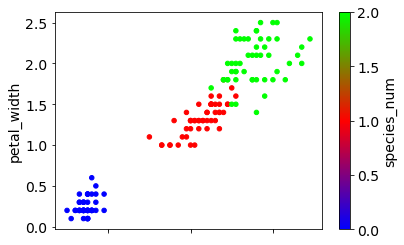

In [31]:
# Map each iris species to a number
# Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and create a column called 'species_num'

# Create a scatterplot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES

# Create a scatterplot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap='brg');


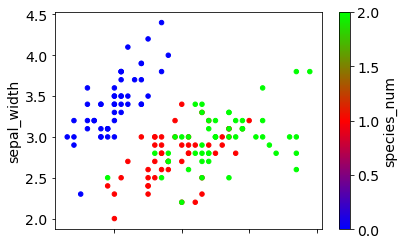

In [32]:
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
iris.plot(kind='scatter', x='sepal_length', y='sepal_width', c='species_num', colormap='brg');


## KNN Classification of the Iris Dataset

### Create your feature matrix "X"
This will be all species measurements (sepal length, petal width, etc...)

In [33]:
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[feature_cols]

### Create your target vector "y"
This will be the species type.

In [34]:
y=iris.species_num

### Make Use of Train-Test-Split
Split your data in to train and test sets.

In [35]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris=train_test_split(X,y,random_state=100)

### Import KNN From `scikit-learn` and Instatiate a Model With One Neighbor

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
print(knn)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')


### Check the Accuracy
Train your model using the training set then use the test set to determine the accuracy

In [37]:
from sklearn import metrics
knn.fit(X_train_iris,y_train_iris)
y_pred=knn.predict(X_test_iris)
print((metrics.accuracy_score(y_test_iris, y_pred)))

0.9736842105263158


### Create a Model With Five Neighbors. Did it Improve?

In [39]:
knn = KNeighborsClassifier(n_neighbors=5)
print((metrics.accuracy_score(y_test_iris, y_pred)))

0.9736842105263158


### Create a Looped Function That Will Check All Levels of Various Neighbors and Calculate the Accuracy

In [43]:
k_range = list(range(1, 101))
training_error = []
testing_error = []

# Find test accuracy for all values of K between 1 and 100 (inclusive).
for k in k_range:

    # Instantiate the model with the current K value.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_iris, y_train_iris)
    
    # Calculate training error (error = 1 - accuracy).
    y_pred_class = knn.predict(X)
    training_accuracy = metrics.accuracy_score(y, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    # Calculate testing error.
    y_pred_class = knn.predict(X_test_iris)
    testing_accuracy = metrics.accuracy_score(y_test_iris, y_pred_class)
    testing_error.append(1 - testing_accuracy)

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [45]:
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=True)
df.head()

,training error,testing error
K,,
1,0.006667,0.026316
2,0.020000,0.026316
3,0.033333,0.026316
4,0.033333,0.052632
5,0.020000,0.026316


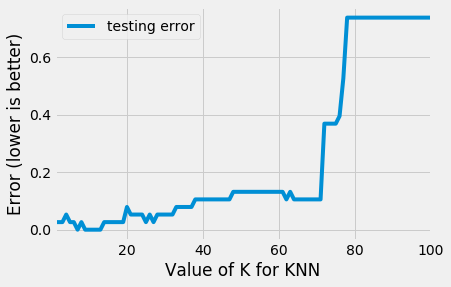

In [46]:
df.plot(y='testing error');
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

In [47]:
min(list(zip(testing_error, k_range)))


(0.0, 7)

In [48]:
knn7 = KNeighborsClassifier(n_neighbors=7)
knn7.fit(X_train_iris, y_train_iris)
pred_7 = knn7.predict(X_test_iris)
metrics.accuracy_score(y_test_iris, pred_7)

1.0

### Bonus: According to `scikit-learn` Documentation, What is `knn.predict_proba(X_new)` Going to Do?

## Enrichment
_Everything beyond this point is enrichment and examples using Statsmodels for linear regression._

### Example: Using the Statsmodels Formula

Adapt the formula example using your metrics. We will review this implementation in class. Here is a reference to consider. The workflow is the same, but the syntax is a little different. We want to get accustomed to the formula syntax because we will be using them a lot more with regressions. The results should be comparable to scikit-learn's regression models.

In [51]:
# First, format our data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [52]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1221.
Date:                Mon, 03 Jun 2019   Prob (F-statistic):          1.38e-321
Time:                        19:06:53   Log-Likelihood:                -1567.5
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     498   BIC:                             3185.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9729      0.224     22.195      0.000       4.533       5.413
LSTAT         -0.5606      0.048    -11.795      0.000      -0.654      -0.467
RAD            0.2128      0.070      3.050      0.002       0.076       0.350
TAX           -0.0174      0.004     -4.272      0.000      -0.025      -0.009
NOX            4.3448      3.384      1.284      0.200      -2.304      10.994
INDUS          0.0924      0.067      1.383      0.167      -0.039       0.224
CRIM          -0.0891      0.037     -2.423      0.016      -0.161      -0.017
ZN             0.0288      0.013      2.220      0.027       0.003       0.054
==============================================================================
Omnibus:                      192.139   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              832.155
Skew:                           1.666   Prob(JB):                    1.99e-181
Kurtosis:                       8.326   Cond. No.                     6.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

In [ ]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [ ]:
# Check out Pearson scores


## Demo: Patsy

In [53]:
import patsy

# Add response to the core DataFrame
df['MEDV'] = y

In [54]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [55]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))

R^2 Score: 0.03990079803645574
